In [0]:
# Colab requires downgrading to Tf v1
!pip install --upgrade tensorflow==1.14.0

## Getting Started

**Understanding Variables in Tf**

1. Constants: Whose value doesn't change in a Computation Graph or Operation
2. Variables: Their values get adjusted in graph
3. Placeholders: To provide input to the graph

In [0]:
import tensorflow as tf
sess = tf.Session()

In [0]:
# Checking if everything's working properly

hello = tf.constant("Hello World, I'm learning Tensorflow")
print(sess.run(hello))

a = tf.constant(10)
b = tf.constant(15)
print("a+b = {}".format(sess.run(a+b)))

In [0]:
sess.close()

## First Tensorflow Model: House Price Prediction 

### Util Functions

In [0]:
# House Price Prediction Sample code
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [0]:
# Plot the house size vs price
def my_scatter_plot(x, y):
    plt.scatter(x, y)
    plt.plot(x, pred)
    plt.ylabel("Price")
    plt.xlabel("Size")

# Plot the house size vs price along with Regression line
def my_combined_plot(x, y, pred):
    plt.scatter(x, y)
    plt.plot(x, pred)
    plt.ylabel("Price")
    plt.xlabel("Size")

### Creating Dataset

Text(0.5, 0, 'Size')

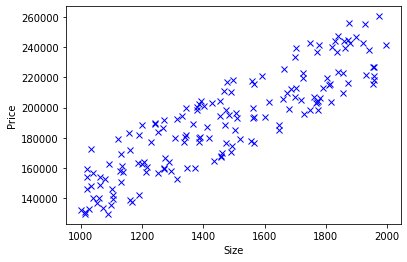

In [3]:
# Generating House sizes
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=2000, size = num_house)

# Generating House Prices with random noise added
np.random.seed(42)
house_price = house_size*100 + np.random.randint(low=20000, high=70000, size = num_house)

# Plot the house size vs price
plt.plot(house_size, house_price, "bx")
plt.ylabel("Price")
plt.xlabel("Size")

### Preprocessing and Train-Test Split

In [4]:
# Data Preprocessing - Standardisation

def normalize(array):
    return (array - array.mean())/array.std()


# Train Test Split
# Defining train data as 70% of total data and 30% as test data

num_train = int(num_house*0.7)

train_house_size = np.asarray(house_size[:num_train])
train_price = np.asarray(house_price[:num_train])

train_house_size = normalize(train_house_size)
train_price = normalize(train_price)

test_house_size = np.asarray(house_size[num_train:])
test_price = np.asarray(house_price[num_train:])

test_house_size = normalize(test_house_size)
test_price = normalize(test_price)

print(train_house_size.shape, train_price.shape)
print(test_house_size.shape, test_price.shape)

(112,) (112,)
(48,) (48,)


### Defining Placeholders and Functions

In [0]:
# Defining Placeholders to provide input data
tf_house_size = tf.placeholder("float", name="house_size")
tf_price = tf.placeholder("float", name="price")

# Defining paramters to be trained
tf_size_factor = tf.Variable(np.random.randn(), "size_factor")
tf_price_offset = tf.Variable(np.random.randn(), "price_offset")


# Defining Inference function
tf_price_pred = tf.add(tf.multiply(tf_house_size, tf_size_factor), tf_price_offset)

# Defining Mean Square Error
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred - tf_price, 2))/(2*num_train)

# Gradient Descent
learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

Testing Finished!


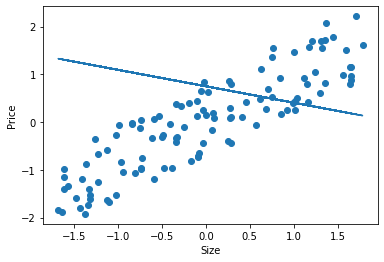

In [43]:
# Checking Model's Performance before Training (Random Intialisation)

pred = []

# Initilizing Variables
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    for x in train_house_size:
        c = sess.run(tf_price_pred, feed_dict={tf_house_size: x})
        pred += [c]        

print("Testing Finished!")

my_combined_plot(train_house_size, train_price, pred)

In [46]:
cost = []
pred = []
test_pred = []

# Initilizing Variables
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    # Starting training
    display_every = 5
    num_iter = 100

    for iter in range(num_iter):

        for (x,y) in zip(train_house_size, train_price):
            sess.run(optimizer, feed_dict = {tf_house_size : x, tf_price : y})

        c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size, tf_price : train_price})
        cost += [c]
            

        # Display current status
        if (iter+1) % display_every == 0:
            # calculate cost after every iteration
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size, tf_price : train_price})
            print("Current Iteration: {} Cost: {} Size_factor: {}  Price_offset: {}".format(iter+1, c, sess.run(tf_size_factor), sess.run(tf_price_offset)))
            

    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size, tf_price : train_price})
    print("\ntraining_cost: {}\tSize_factor: {}\tPrice_offset: {}".format(training_cost, sess.run(tf_size_factor), sess.run(tf_price_offset)))

    print("Checking performance of model on Training Dataset...\n")
    for x in train_house_size:
        c = sess.run(tf_price_pred, feed_dict={tf_house_size: x})
        pred += [c]        

    print("Checking performance of model on Testing Dataset...\n")
    for x in test_house_size:
        c = sess.run(tf_price_pred, feed_dict={tf_house_size: x})
        test_pred += [c]        

    print("Testing Finished!")
    

Current Iteration: 5 Cost: 0.49271896481513977 Size_factor: 0.1371573656797409  Price_offset: 0.45559144020080566
Current Iteration: 10 Cost: 0.253540962934494 Size_factor: 0.4288492798805237  Price_offset: 0.2766033113002777
Current Iteration: 15 Cost: 0.16557186841964722 Size_factor: 0.6056517958641052  Price_offset: 0.16807542741298676
Current Iteration: 20 Cost: 0.13319776952266693 Size_factor: 0.7128171920776367  Price_offset: 0.1022706851363182
Current Iteration: 25 Cost: 0.1212720051407814 Size_factor: 0.7777732014656067  Price_offset: 0.062370628118515015
Current Iteration: 30 Cost: 0.11687184125185013 Size_factor: 0.8171449899673462  Price_offset: 0.03817761689424515
Current Iteration: 35 Cost: 0.11524410545825958 Size_factor: 0.8410094380378723  Price_offset: 0.023508386686444283
Current Iteration: 40 Cost: 0.11463940143585205 Size_factor: 0.8554741740226746  Price_offset: 0.014613861218094826
Current Iteration: 45 Cost: 0.11441320180892944 Size_factor: 0.8642423152923584  Pr

Text(0.5, 0, 'Epoch')

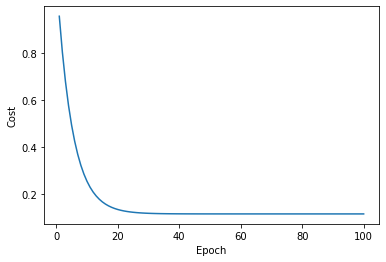

In [47]:
# Plot Traing Curve
plt.plot(list(range(1,101)), cost)
plt.ylabel("Cost")
plt.xlabel("Epoch")

Text(0.5, 0, 'Size')

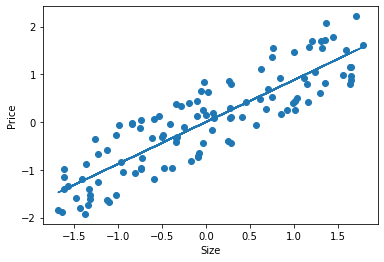

In [48]:
# Plot the house size vs price
plt.scatter(train_house_size, train_price)
plt.plot(train_house_size, pred)
plt.ylabel("Price")
plt.xlabel("Size")

Text(0.5, 0, 'Size')

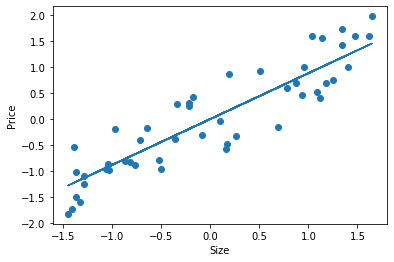

In [50]:
# Plot the house size vs price
plt.scatter(test_house_size, test_price)
plt.plot(test_house_size, test_pred)
plt.ylabel("Price")
plt.xlabel("Size")